In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
# Set your username and token here!
username = 'nsubhash'
token = 'token-nsubhash2'

# Set the datastream and start/enddates
datastream = 'bnfmetM1.b1'
startdate = '2025-04-01T00:00:00'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

#datastream = 'bnfaossmpsM1.b1'
#result_smps = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] bnfmetM1.b1.20250425.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250411.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250402.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250424.010100.cdf
[DOWNLOADING] bnfmetM1.b1.20250419.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250421.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250406.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250410.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250415.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250417.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250414.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250423.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250405.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250412.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250426.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250413.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250427.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250404.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250430.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250416.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250428.000000.cdf
[DOWNLOADING] bnfmetM1.b1.20250403

In [5]:
ds_met = act.io.read_arm_netcdf(result_met)
ds_met

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 11MB
Dimensions:                       (time: 43139, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 345kB 2025-04-01 ... ...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     (time) datetime64[ns] 345kB 2025-04-01 ... ...
    time_offset                   (time) datetime64[ns] 345kB 2025-04-01 ... ...
    time_bounds                   (time, bound) object 690kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 173kB 34.34 34.34 ... 34.34
    lon                           (time) float32 173kB -87.34 -87.34 ... -87.34
    alt                           (time) float32 173kB 293.0 293.0 ... 293.0
Attributes: (12/26)
    command_line:                met_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el9
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/bnf/bnfmetM1.00/M1_MET_Tabl...
    site_id:                     bnf
    ...                          ...
    tbrg_precip_corr_info:       0.001000 * tbrg_precip_total^2 + 0.883000 * ...
    history:                     created by user armflowprod on machine prod-...
    _file_dates:                 ['20250401', '20250402', '20250403', '202504...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 bnfmetM1.b1
    _arm_standards_flag:         1

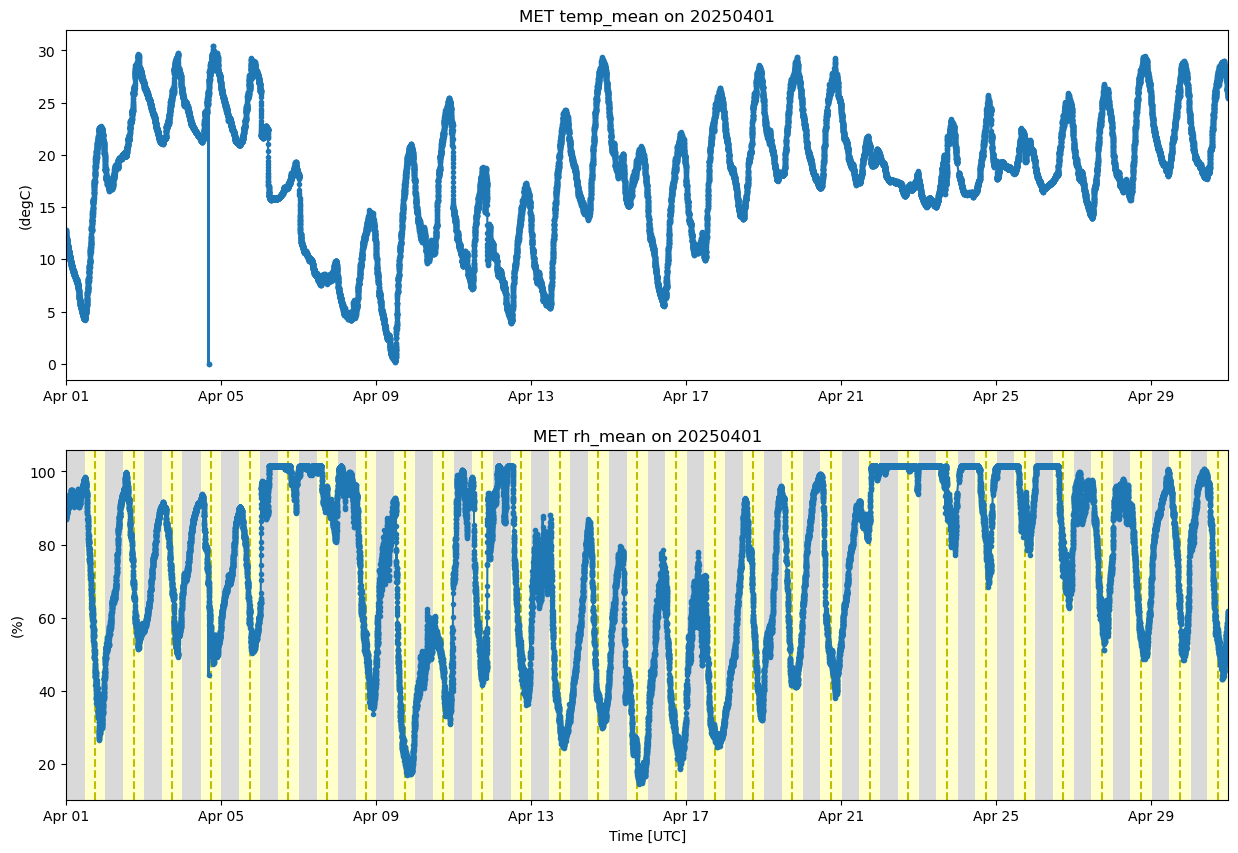

In [7]:
display = act.plotting.TimeSeriesDisplay({'MET': ds_met}, figsize=(15, 10), subplot_shape=(2,))

display.plot('temp_mean', dsname='MET', subplot_index=(0,))
display.plot('rh_mean', dsname='MET', subplot_index=(1,))


# ax2 = display.axes[1].twinx()
# ax2.plot(ds_met.time, ds_met.time, color='orange')

# Plot up a day/night background
display.day_night_background(dsname='MET', subplot_index=(1,))

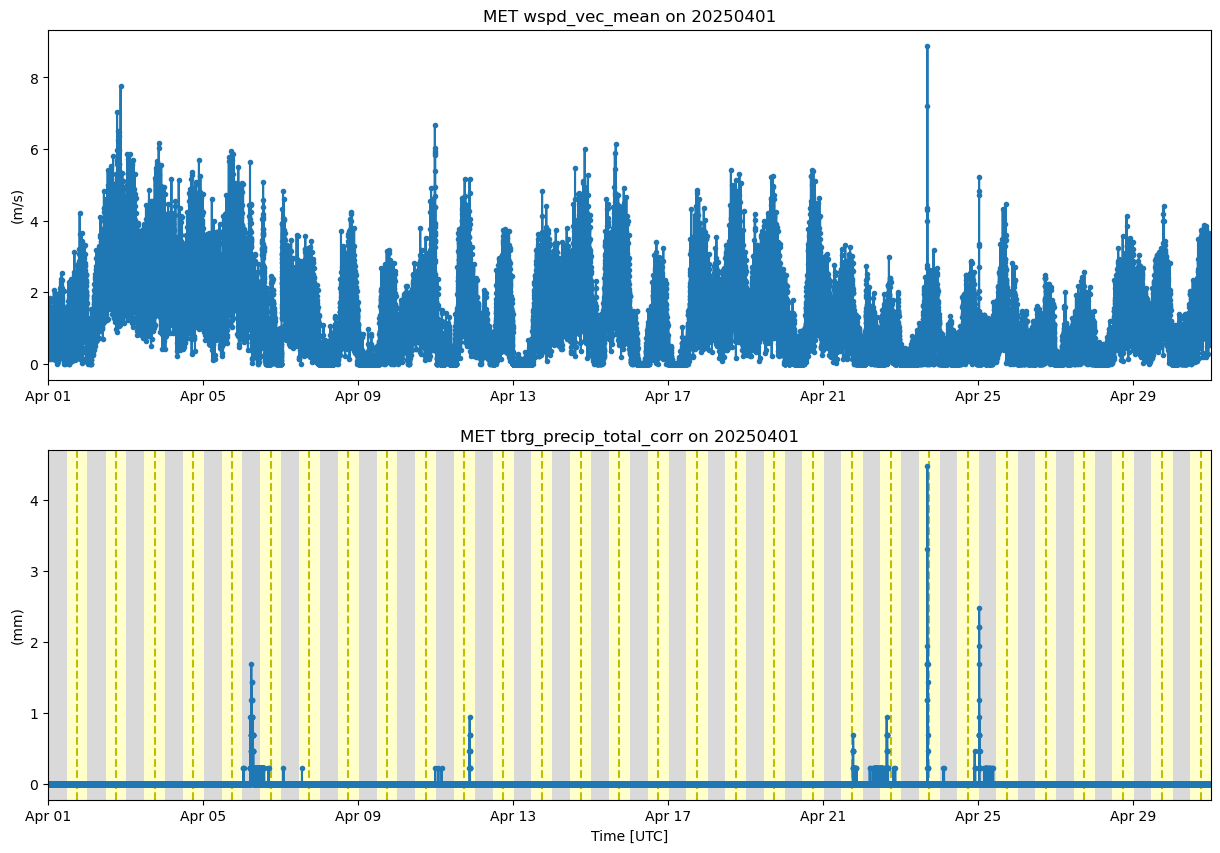

In [8]:
display = act.plotting.TimeSeriesDisplay({'MET': ds_met}, figsize=(15, 10), subplot_shape=(2,))


display.plot('wspd_vec_mean', dsname='MET', subplot_index=(0,))
display.plot('tbrg_precip_total_corr', dsname='MET', subplot_index=(1,))

# ax2 = display.axes[1].twinx()
# ax2.plot(ds_met.time, ds_met.time, color='orange')

# Plot up a day/night background
display.day_night_background(dsname='MET', subplot_index=(1,))